<font size=3>In this notebook, we present:
    <li>A comparison on the age group distributions in Bangsar and its constituents </li>
    <li></li>
</font>

In [81]:
import pandas as pd
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
def age_group_count(votersData,DM):    
    """
    Return count of each group in a voting population
    """
    return votersData[votersData['NamaDM']==DM ]['AgeGroup'].value_counts()

def get_totalvoters(votersData, DM):
    """
    Return size of voting population in a DM
    """
    return len(votersData[votersData['NamaDM']==DM])

def age_group_ratio(votersData, DM):
    """
    Return percentage of each age group that comprises a voting population
    """
    ratio = age_group_count(votersData, DM) / get_totalvoters(votersData, DM)

    return ratio

def get_released_vote_count(scoreData, DM):
    """
    Get the total numebr of votes released at polling station on election day.
    Total = Rejected votes + Not Returned votes + Accepted votes
    """
    scoreData_DM = scoreData[scoreData['NAMA DM'] == DM]
    return scoreData_DM[['VotesByElectors','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)']].sum().sum()

def calculate_age(born):
    """
    Returns age as of election day
    """
    electionday = pd.to_datetime('2018-05-09')
    return electionday.year - born.year - ((electionday.month, electionday.day) < (born.month, born.day))

Load data

In [64]:
# VOTERS
roll14 = pd.read_csv('../data/Lembah Pantai GE14 Roll.csv')
roll13 = pd.read_csv('../data/Lembah Pantai GE13 Roll.csv')

# SCORE
score_bangsar = pd.read_excel('../data/results.xlsx', sheetname='Bangsar')
score_bangsar14 = score_bangsar[score_bangsar['GE'] == 'GE14']
score_bangsar13 = score_bangsar[score_bangsar['GE'] == 'GE13']

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,6,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


### HIDE

In [65]:
## In GE 14, there is no independent candidate
score_bangsar14.drop('Bebas', axis=1, inplace=True)
score_bangsar14.head()

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,GE,NAMA DM,PollingCentreName,Stream,VotersNum,JUM TIDAK KELUAR MENGUNDI,VotesByElectors,Rejected Votes,BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D),PAS,Barisan Nasional,Pakatan Rakyat,Turnout
0,GE14,BANGSAR BARU,SEKOLAH KEBANGSAAN BUKIT BANDARAYA,1,350.0,140.0,210,0,0,5.0,42,163,NaN
1,GE14,BANGSAR BARU,SEKOLAH KEBANGSAAN BUKIT BANDARAYA,2,670.0,180.0,490,0,0,11.0,71,408,NaN
2,GE14,BANGSAR BARU,SEKOLAH KEBANGSAAN BUKIT BANDARAYA,3,670.0,156.0,514,0,0,12.0,54,448,NaN
3,GE14,BANGSAR BARU,SEKOLAH KEBANGSAAN BUKIT BANDARAYA,4,670.0,141.0,529,0,0,6.0,50,473,NaN
4,GE14,BANGSAR BARU,SEKOLAH KEBANGSAAN BUKIT BANDARAYA,5,670.0,142.0,528,0,0,16.0,71,441,NaN


Bangsar DMs:
<li>Bangsar Baru</li>
<li>Taman Lucky</li>
<li>Jalan Maarof</li>

In [66]:
## Subsetting for Bangsar voter roll (GE 14)
roll_bangsar14 = roll14[(roll14['NamaDM']=='BANGSAR BARU') | (roll14['NamaDM']=='TAMAN LUCKY') |(roll14['NamaDM']=='JALAN MAAROF')]

## Get voters' Age
roll_bangsar14['Age'] = pd.to_datetime(roll_bangsar14['TahunLahir']).apply(lambda x: calculate_age(x)) 

## Binning voters's age 
max_age = max(roll_bangsar14['Age'].max(),roll_bangsar13['Umur'].max())
roll_bangsar14['AgeGroup'] = pd.cut(roll_bangsar14['Age'], [20,30,40,50,60,70,80,max_age] )

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [67]:
## Subsetting for Bangsar voter roll (GE 13)
roll_bangsar13 = roll13[(roll13['NamaDM']=='BANGSAR BARU') | (roll13['NamaDM']=='TAMAN LUCKY') |(roll13['NamaDM']=='JALAN MAAROF')]
roll_bangsar13['AgeGroup'] = pd.cut(roll_bangsar13['Umur'], bins=[20,30,40,50,60,70,80,max_age])

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
## Comparing age group distributions in Bangsar, between GE13 & GE14
bangsar_age_compare = pd.DataFrame([roll_bangsar13['AgeGroup'].value_counts(),roll_bangsar14['AgeGroup'].value_counts() ]).T
bangsar_age_compare.columns = ['GE13','GE14'] # rename columns
bangsar_age_compare

,GE13,GE14
"(20, 30]",973,930
"(30, 40]",1838,1717
"(40, 50]",2389,2407
"(50, 60]",2729,2620
"(60, 70]",2278,2527
"(70, 80]",1258,1672
"(80, 109]",481,672


In [76]:
## Get the ratio of age group distribution in Bangsar in both GE's
bangsar_age_compare['GE13_p'] = bangsar_age_compare['GE13']/bangsar_age_compare['GE13'].sum()
bangsar_age_compare['GE14_p'] = bangsar_age_compare['GE14']/bangsar_age_compare['GE14'].sum()
bangsar_age_compare.head()

,GE13,GE14,GE13_p,GE14_p
"(20, 30]",973,930,0.081450,0.074133
"(30, 40]",1838,1717,0.153859,0.136867
"(40, 50]",2389,2407,0.199983,0.191869
"(50, 60]",2729,2620,0.228445,0.208848
"(60, 70]",2278,2527,0.190691,0.201435


In [77]:
##
bangsar_age_compare2 = bangsar_age_compare[['GE13','GE14']].unstack().reset_index()
bangsar_age_compare2.columns = ['GE','AgeGroup','count']

##
bangsar_age_compare_p = bangsar_age_compare[['GE13_p','GE14_p']]
bangsar_age_compare_p2 = bangsar_age_compare_p[['GE13_p','GE14_p']].unstack().reset_index()
bangsar_age_compare_p2.columns = ['GE','AgeGroup','count']

Text(0.5,0.98,'Age Group (Count, Percentage)')

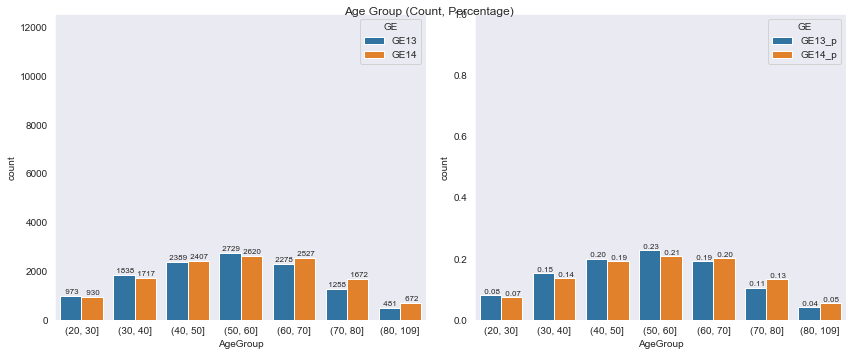

In [82]:
f,ax = plt.subplots(1,2, figsize=(12,5))
p1 = sns.barplot(y='count', x='AgeGroup', hue='GE',data=bangsar_age_compare2, ax=ax[0])
p2 = sns.barplot(y='count', x='AgeGroup', hue='GE',data=bangsar_age_compare_p2, ax=ax[1])

for patch in p1.patches:
    try:
        if patch.get_height()>0:
            p1.annotate(' %.f' % patch.get_height(), xy=( patch.get_x() + patch.get_width()/2 ,patch.get_height()+ 100), ha='center',fontsize=8)
    except:
        pass

for patch in p2.patches:
    try:
        if patch.get_height()>0:
            p2.annotate(' %.2f' % patch.get_height(), xy=( patch.get_x() + patch.get_width()/2 ,patch.get_height()+0.005), ha='center',fontsize=8)
    except:
        pass
    
p1.set_ylim(0,len(roll_bangsar14))
p2.set_ylim(0,1)
    
plt.tight_layout()
plt.suptitle('Age Group (Count, Percentage)')

## ANALYSIS

<h5>Bangsar: GE14

In [83]:
age_group14_dict_bangsarbaru = dict(age_group_ratio(roll_bangsar14, 'BANGSAR BARU') )
age_group14_dict_jlnmaarof = dict(age_group_ratio(roll_bangsar14, 'JALAN MAAROF') )
age_group14_dict_tmnlucky = dict(age_group_ratio(roll_bangsar14, 'TAMAN LUCKY') )

In [84]:
score_bangsarbaru14 = score_bangsar14[score_bangsar14['NAMA DM']=='BANGSAR BARU']
score_jlnmaarof14 = score_bangsar14[score_bangsar14['NAMA DM']=='JALAN MAAROF']
score_tmnlucky14 = score_bangsar14[score_bangsar14['NAMA DM']=='TAMAN LUCKY']

bangsarbaru_total_released_votes14 = get_released_vote_count(score_bangsar14 , "BANGSAR BARU")
jlnmaarof_total_released_votes14 = get_released_vote_count(score_bangsar14 , "JALAN MAAROF")
tmnlucky_total_released_votes14 = get_released_vote_count(score_bangsar14 , "TAMAN LUCKY")

In [85]:
print('Total votes in Bangsar Baru in GE14: ', bangsarbaru_total_released_votes14)
print('Total votes in Jalan Maarof in GE14: ', jlnmaarof_total_released_votes14)
print('Total votes in Taman Lucky in GE14: ', tmnlucky_total_released_votes14)

Total votes in Bangsar Baru in GE14:  4399
Total votes in Jalan Maarof in GE14:  2731
Total votes in Taman Lucky in GE14:  2531


<h5>Bangsar: GE13

In [86]:
age_group13_dict_bangsarbaru = dict(age_group_ratio(roll_bangsar13, 'BANGSAR BARU') )
age_group13_dict_jlnmaarof = dict(age_group_ratio(roll_bangsar13, 'JALAN MAAROF') )
age_group13_dict_tmnlucky = dict(age_group_ratio(roll_bangsar13, 'TAMAN LUCKY') )

In [87]:
score_bangsarbaru13= score_bangsar13[score_bangsar13['NAMA DM']=='BANGSAR BARU']
score_jlnmaarof13 = score_bangsar13[score_bangsar13['NAMA DM']=='JALAN MAAROF']
score_tmnlucky13 = score_bangsar13[score_bangsar13['NAMA DM']=='TAMAN LUCKY']

bangsarbaru_total_released_votes13 = get_released_vote_count(score_bangsar13 , "BANGSAR BARU")
jlnmaarof_total_released_votes13 = get_released_vote_count(score_bangsar13 , "JALAN MAAROF")
tmnlucky_total_released_votes13 = get_released_vote_count(score_bangsar13 , "TAMAN LUCKY")

In [88]:
print('Total votes in Bangsar Baru in GE13: ', bangsarbaru_total_released_votes13)
print('Total votes in Jalan Maarof in GE13: ', jlnmaarof_total_released_votes13)
print('Total votes in Taman Lucky in GE13: ', tmnlucky_total_released_votes13)

Total votes in Bangsar Baru in GE13:  4138
Total votes in Jalan Maarof in GE13:  2664
Total votes in Taman Lucky in GE13:  4702


Text(0.5,1,'Taman Lucky')

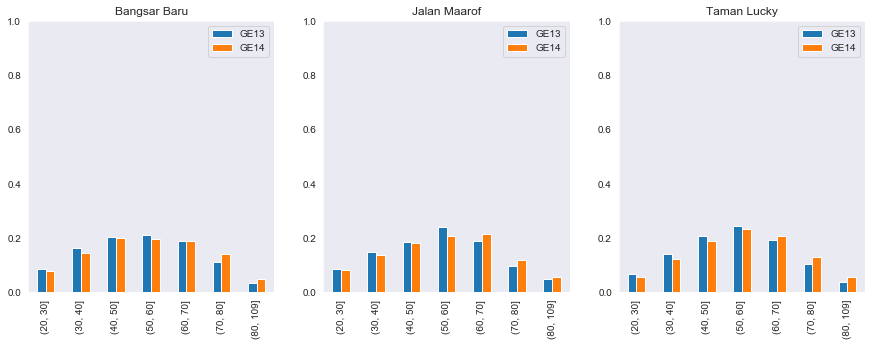

In [89]:
f,ax = plt.subplots(1,3, figsize=(15,5))
pd.DataFrame({'GE13':age_group13_dict_bangsarbaru}).join(pd.DataFrame({'GE14':age_group14_dict_bangsarbaru})).plot.bar(ax=ax[0])
pd.DataFrame({'GE13':age_group13_dict_jlnmaarof}).join(pd.DataFrame({'GE14':age_group14_dict_jlnmaarof})).plot.bar(ax=ax[1])
pd.DataFrame({'GE13':age_group13_dict_tmnlucky}).join(pd.DataFrame({'GE14':age_group14_dict_tmnlucky})).plot.bar(ax=ax[2])

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)

ax[0].set_title('Bangsar Baru')
ax[1].set_title('Jalan Maarof')
ax[2].set_title('Taman Lucky')


<h6> Bangsar - Taman Lucky

<font size=3> 
    In GE 13, Pakatan Rakyat won the most votes in Taman Lucky, leading BN by 574 votes.
</font>

In [90]:
score_tmnlucky13[['JUM TIDAK KELUAR MENGUNDI','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)','Bebas','Barisan Nasional ','Pakatan Rakyat','Turnout']].sum()

JUM TIDAK KELUAR MENGUNDI                       0.0
Rejected Votes                                 58.0
BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)       0.0
Bebas                                           4.0
Barisan Nasional                             2033.0
Pakatan Rakyat                               2607.0
Turnout                                         0.0
dtype: float64

Number of votes cast/not cast by Taman Lucky voters who turn out in <b>GE13</b>:

In [113]:
for v in ['Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)','Bebas','Barisan Nasional ','Pakatan Rakyat']:
    print(v + ': ', score_tmnlucky13[v].sum()/tmnlucky_total_released_votes13)

Rejected Votes:  0.01233517652062952
BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D):  0.0
Bebas:  0.0008507018290089324
Barisan Nasional :  0.43236920459378986
Pakatan Rakyat:  0.5544449170565716


Number of votes cast/not cast by Taman Lucky voters who turn out in <b>GE14</b>:

In [115]:
for v in ['Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)','PAS','Barisan Nasional ','Pakatan Rakyat']:
    print(v + ': ', score_tmnlucky14[v].sum()/tmnlucky_total_released_votes14)

Rejected Votes:  0.002765705254839984
BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D):  0.001185302252074279
PAS:  0.030422757803239827
Barisan Nasional :  0.14776768075859345
Pakatan Rakyat:  0.8139075464243382


<h6> Bangsar - Jalan Maarof

Number of votes cast/not cast by Jalan Maarof voters who turn out in <b>GE13</b>:

In [116]:
for v in ['Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)','Bebas','Barisan Nasional ','Pakatan Rakyat']:
    print(v + ': ', score_jlnmaarof13[v].sum()/jlnmaarof_total_released_votes13)

Rejected Votes:  0.004129129129129129
BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D):  0.0007507507507507507
Bebas:  0.0037537537537537537
Barisan Nasional :  0.26576576576576577
Pakatan Rakyat:  0.7256006006006006


Number of votes cast/not cast by Jalan Maarof voters who turn out in <b>GE14</b>:

In [117]:
for v in ['Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)','PAS','Barisan Nasional ','Pakatan Rakyat']:
    print(v + ': ', score_jlnmaarof14[v].sum()/jlnmaarof_total_released_votes14)

Rejected Votes:  0.0
BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D):  0.0
PAS:  0.01904064445258147
Barisan Nasional :  0.13365067740754302
Pakatan Rakyat:  0.8473086781398755


<h6> Bangsar - Bangsar Baru

Number of votes cast/not cast by Bangsar Baru voters who turn out in <b>GE13</b>:

In [119]:
for v in ['Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)','Bebas','Barisan Nasional ','Pakatan Rakyat']:
    print(v + ': ', score_bangsarbaru13[v].sum()/bangsarbaru_total_released_votes13)

Rejected Votes:  0.0028999516674722086
BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D):  0.0002416626389560174
Bebas:  0.0019333011116481392
Barisan Nasional :  0.2288545190913485
Pakatan Rakyat:  0.7660705654905752


Number of votes cast/not cast by Bangsar Baru voters who turn out in <b>GE14</b>:

In [118]:
for v in ['Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)','PAS','Barisan Nasional ','Pakatan Rakyat']:
    print(v + ': ', score_bangsarbaru14[v].sum()/bangsarbaru_total_released_votes14)

Rejected Votes:  0.0
BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D):  0.0
PAS:  0.0206865196635599
Barisan Nasional :  0.10752443737213004
Pakatan Rakyat:  0.87178904296431


In [120]:
bangsar_dict13 = {'JALAN MAAROF':{'BN': score_jlnmaarof13['Barisan Nasional '].sum() / jlnmaarof_total_released_votes13,
                              'Pakatan':score_jlnmaarof13['Pakatan Rakyat'].sum() / jlnmaarof_total_released_votes13,
                               'Bebas':score_jlnmaarof13['Bebas'].sum() / jlnmaarof_total_released_votes13,
                                'UndiRosak':score_jlnmaarof13['Rejected Votes'].sum() / jlnmaarof_total_released_votes13,
                                'NorReturnedVote':score_jlnmaarof13['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum() / bangsarbaru_total_released_votes13},
               'BANGSAR BARU':{'BN': score_bangsarbaru13['Barisan Nasional '].sum() / bangsarbaru_total_released_votes13,
                              'Pakatan':score_bangsarbaru13['Pakatan Rakyat'].sum() / bangsarbaru_total_released_votes13,
                               'Bebas':score_bangsarbaru13['Bebas'].sum() / bangsarbaru_total_released_votes13,
                                'UndiRosak':score_bangsarbaru13['Rejected Votes'].sum() / bangsarbaru_total_released_votes13,
                                'NorReturnedVote':score_bangsarbaru13['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum() / jlnmaarof_total_released_votes13},
               'TAMAN LUCKY':{'BN': score_tmnlucky13['Barisan Nasional '].sum() / tmnlucky_total_released_votes13,
                              'Pakatan':score_tmnlucky13['Pakatan Rakyat'].sum() / tmnlucky_total_released_votes13,
                               'Bebas':score_tmnlucky13['Bebas'].sum() / tmnlucky_total_released_votes13,
                                'UndiRosak':score_tmnlucky13['Rejected Votes'].sum() / tmnlucky_total_released_votes13,
                                'NorReturnedVote':score_tmnlucky13['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum() / tmnlucky_total_released_votes13}}

bangsar_dict14 = {'JALAN MAAROF':{'BN': score_jlnmaarof14['Barisan Nasional '].sum() / jlnmaarof_total_released_votes14,
                              'Pakatan':score_jlnmaarof14['Pakatan Rakyat'].sum() / jlnmaarof_total_released_votes14,
                               'PAS':score_jlnmaarof14['PAS'].sum() / jlnmaarof_total_released_votes14,
                                'UndiRosak':score_jlnmaarof14['Rejected Votes'].sum() / jlnmaarof_total_released_votes14,
                                'NorReturnedVote':score_jlnmaarof14['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum() / jlnmaarof_total_released_votes14},
               'BANGSAR BARU':{'BN': score_bangsarbaru14['Barisan Nasional '].sum() / bangsarbaru_total_released_votes14,
                              'Pakatan':score_bangsarbaru14['Pakatan Rakyat'].sum() / bangsarbaru_total_released_votes14,
                               'PAS':score_bangsarbaru14['PAS'].sum() / bangsarbaru_total_released_votes14,
                                'UndiRosak':score_bangsarbaru14['Rejected Votes'].sum() / bangsarbaru_total_released_votes14,
                                'NorReturnedVote':score_bangsarbaru14['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum() / jlnmaarof_total_released_votes13},
               'TAMAN LUCKY':{'BN': score_tmnlucky14['Barisan Nasional '].sum() / tmnlucky_total_released_votes14,
                              'Pakatan':score_tmnlucky14['Pakatan Rakyat'].sum() / tmnlucky_total_released_votes14,
                               'PAS':score_tmnlucky14['PAS'].sum() / tmnlucky_total_released_votes14,
                                'UndiRosak':score_tmnlucky14['Rejected Votes'].sum() / tmnlucky_total_released_votes14,
                                'NorReturnedVote':score_tmnlucky14['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum() / tmnlucky_total_released_votes14}}

In [121]:
bb13 = bangsar_dict13['BANGSAR BARU']
bb14 = bangsar_dict14['BANGSAR BARU']

tl13 = bangsar_dict13['TAMAN LUCKY']
tl14 = bangsar_dict14['TAMAN LUCKY']

jm13 = bangsar_dict13['JALAN MAAROF']
jm14 = bangsar_dict14['JALAN MAAROF']

In [122]:
bangsarbaru = pd.DataFrame({'bangsarbaru13':bb13, 'bangsarbaru14':bb14})
jalanmaarof = pd.DataFrame({'jalanmaarof13':jm13, 'jalanmaarof14':jm14})
tamanlucky = pd.DataFrame({'tamanlucky13':tl13, 'tamanlucky14':tl14})

In [123]:
bangsarbaru.loc['Bebas','bangsarbaru14'] = bangsarbaru.loc['PAS','bangsarbaru14']
bangsarbaru.drop('PAS', inplace=True)
bangsarbaru.index = ['BN', 'Bebas to PAS', 'NorReturnedVote', 'Pakatan', 'UndiRosak']

jalanmaarof.loc['Bebas','jalanmaarof14'] = jalanmaarof.loc['PAS','jalanmaarof14']
jalanmaarof.drop('PAS', inplace=True)
jalanmaarof.index = ['BN', 'Bebas to PAS', 'NorReturnedVote', 'Pakatan', 'UndiRosak']

tamanlucky.loc['Bebas','tamanlucky14'] = tamanlucky.loc['PAS','tamanlucky14']
tamanlucky.drop('PAS', inplace=True)
tamanlucky.index = ['BN', 'Bebas to PAS', 'NorReturnedVote', 'Pakatan', 'UndiRosak']

In [124]:
pd.DataFrame({'bangsarbaru_14':age_group14_dict_bangsarbaru})\
.join(pd.DataFrame({'jlnmaarof_14':age_group14_dict_jlnmaarof}))\
.join(pd.DataFrame({'tmnlucky_14':age_group14_dict_tmnlucky}))

,bangsarbaru_14,jlnmaarof_14,tmnlucky_14
"(20, 30]",0.078201,0.081972,0.058165
"(30, 40]",0.143426,0.138310,0.123484
"(40, 50]",0.199135,0.183099,0.188491
"(50, 60]",0.196713,0.206197,0.233593
"(60, 70]",0.190311,0.214648,0.206843
"(70, 80]",0.142561,0.120000,0.131260
"(80, 109]",0.049654,0.055775,0.058165


In [125]:
pd.DataFrame({'bangsarbaru_13':age_group13_dict_bangsarbaru})\
.join(pd.DataFrame({'jlnmaarof_13':age_group13_dict_jlnmaarof}))\
.join(pd.DataFrame({'tmnlucky_13':age_group13_dict_tmnlucky}))

,bangsarbaru_13,jlnmaarof_13,tmnlucky_13
"(20, 30]",0.085214,0.087034,0.069496
"(30, 40]",0.163093,0.150385,0.142374
"(40, 50]",0.204289,0.187093,0.206335
"(50, 60]",0.212566,0.239491,0.242927
"(60, 70]",0.189240,0.190941,0.192804
"(70, 80]",0.110798,0.095619,0.106396
"(80, 109]",0.034801,0.049438,0.039668


In [144]:
parties = ['Barisan Nasional ','Pakatan Rakyat','Bebas','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)']
parties_short = ['BN','Pakatan','Bebas','Rejected','NotReturned']

dict_score_13_bangsarbaru = {}
dict_score_13_jlnmaarof = {}
dict_score_13_tmnlucky = {}

## Storing vote distribution in all 3 bangsar localities, during GE13
for p, ps in zip(parties, parties_short):
    dict_score_13_bangsarbaru.update({ps:score_bangsarbaru13[p].sum()/bangsarbaru_total_released_votes13})

for p, ps in zip(parties, parties_short):
    dict_score_13_jlnmaarof.update({ps:score_jlnmaarof13[p].sum()/jlnmaarof_total_released_votes13})

for p, ps in zip(parties, parties_short):
    dict_score_13_tmnlucky.update({ps:score_tmnlucky13[p].sum()/tmnlucky_total_released_votes13})



In [148]:
parties_14 = ['Barisan Nasional ','Pakatan Rakyat','PAS','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)']
parties_short_14 = ['BN','Pakatan','PAS','Rejected','NotReturned']

dict_score_14_bangsarbaru = {}
dict_score_14_jlnmaarof = {}
dict_score_14_tmnlucky = {}

## Storing vote distribution in all 3 bangsar localities, during GE14
for p, ps in zip(parties_14, parties_short_14):
    dict_score_14_bangsarbaru.update({ps:score_bangsarbaru14[p].sum()/bangsarbaru_total_released_votes14})

for p, ps in zip(parties_14, parties_short_14):
    dict_score_14_jlnmaarof.update({ps:score_jlnmaarof14[p].sum()/jlnmaarof_total_released_votes14})

for p, ps in zip(parties_14, parties_short_14):
    dict_score_14_tmnlucky.update({ps:score_tmnlucky14[p].sum()/tmnlucky_total_released_votes14})

In [154]:
df_bb_score = pd.DataFrame({'GE13':dict_score_13_bangsarbaru})\
.join(pd.DataFrame({'GE14':dict_score_14_bangsarbaru}), how='outer')

df_jm_score = pd.DataFrame({'GE13':dict_score_13_jlnmaarof})\
.join(pd.DataFrame({'GE14':dict_score_14_jlnmaarof}), how='outer')

df_tl_score = pd.DataFrame({'GE13':dict_score_13_tmnlucky})\
.join(pd.DataFrame({'GE14':dict_score_14_tmnlucky}), how='outer')

for df in [df_bb_score, df_jm_score, df_tl_score]:
    df.loc['Bebas','GE14'] = df.loc['PAS','GE14']
    df.drop('PAS', inplace=True)
    df.index = ['BN', 'Bebas->PAS', 'NotReturned', 'Pakatan', 'Rejected']

In [155]:
df_jm = pd.DataFrame({'GE13':{'BN':score_jlnmaarof13['Barisan Nasional '].sum(),
'Pakatan':score_jlnmaarof13['Pakatan Rakyat'].sum(),
'Bebas->PAS':score_jlnmaarof13['Bebas'].sum(),
'Rejected':score_jlnmaarof13['Rejected Votes'].sum(),
'NotReturned':score_jlnmaarof13['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum()} ,
             'GE14':{'BN':score_jlnmaarof14['Barisan Nasional '].sum(),
'Pakatan':score_jlnmaarof14['Pakatan Rakyat'].sum(),
'Bebas->PAS':score_jlnmaarof14['PAS'].sum(),
'Rejected':score_jlnmaarof14['Rejected Votes'].sum(),
'NotReturned':score_jlnmaarof14['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum()}})

df_tl = pd.DataFrame({'GE13':{'BN':score_tmnlucky13['Barisan Nasional '].sum(),
'Pakatan':score_tmnlucky13['Pakatan Rakyat'].sum(),
'Bebas->PAS':score_tmnlucky13['Bebas'].sum(),
'Rejected':score_tmnlucky13['Rejected Votes'].sum(),
'NotReturned':score_tmnlucky13['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum()} ,
             'GE14':{'BN':score_tmnlucky14['Barisan Nasional '].sum(),
'Pakatan':score_tmnlucky14['Pakatan Rakyat'].sum(),
'Bebas->PAS':score_tmnlucky14['PAS'].sum(),
'Rejected':score_tmnlucky14['Rejected Votes'].sum(),
'NotReturned':score_tmnlucky14['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum()}})

df_bb = pd.DataFrame({'GE13':{'BN':score_bangsarbaru13['Barisan Nasional '].sum(),
'Pakatan':score_bangsarbaru13['Pakatan Rakyat'].sum(),
'Bebas->PAS':score_bangsarbaru13['Bebas'].sum(),
'Rejected':score_bangsarbaru13['Rejected Votes'].sum(),
'NotReturned':score_bangsarbaru13['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum()} ,
             'GE14':{'BN':score_bangsarbaru14['Barisan Nasional '].sum(),
'Pakatan':score_bangsarbaru14['Pakatan Rakyat'].sum(),
'Bebas->PAS':score_bangsarbaru14['PAS'].sum(),
'Rejected':score_bangsarbaru14['Rejected Votes'].sum(),
'NotReturned':score_bangsarbaru14['BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)'].sum()}})

In [156]:
score_tmnlucky13[['VotersNum','JUM TIDAK KELUAR MENGUNDI','VotesByElectors','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)','Bebas','Barisan Nasional ','Pakatan Rakyat']]

,VotersNum,JUM TIDAK KELUAR MENGUNDI,VotesByElectors,Rejected Votes,BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D),Bebas,Barisan Nasional,Pakatan Rakyat
35,NaN,NaN,214,2,0,0.0,80,134
36,NaN,NaN,526,7,0,1.0,188,337
37,NaN,NaN,539,5,0,0.0,217,322
38,NaN,NaN,569,5,0,0.0,243,326
39,NaN,NaN,572,4,0,0.0,271,301
40,NaN,NaN,583,6,0,0.0,278,305
41,NaN,NaN,564,6,0,1.0,284,279
42,NaN,NaN,543,2,0,1.0,226,316
43,NaN,NaN,534,21,0,1.0,246,287


In [157]:
score_tmnlucky14[['VotersNum','JUM TIDAK KELUAR MENGUNDI','VotesByElectors','Rejected Votes','BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D)','PAS','Barisan Nasional ','Pakatan Rakyat']]

,VotersNum,JUM TIDAK KELUAR MENGUNDI,VotesByElectors,Rejected Votes,BIL KERTAS UNDI YG TIDAK DIKEMBALIKAN (D),PAS,Barisan Nasional,Pakatan Rakyat
9,350.0,117.0,233,0,0,7.0,40,186
10,572.0,127.0,445,2,0,13.0,93,337
11,572.0,122.0,450,1,0,10.0,74,365
12,572.0,125.0,447,1,0,11.0,45,390
13,572.0,105.0,467,1,2,17.0,52,395
14,574.0,95.0,479,2,1,19.0,70,387


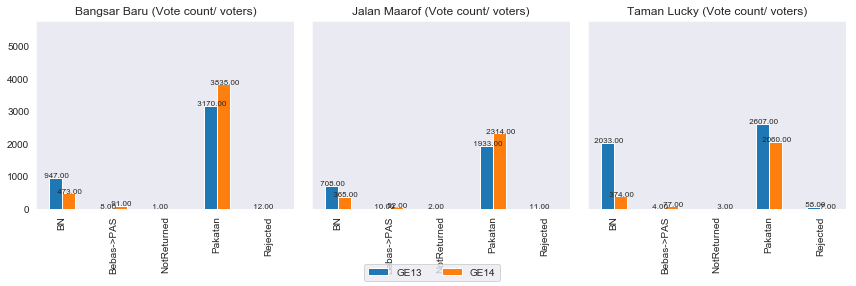

In [158]:
f, ax = plt.subplots(1,3, figsize=(12,4))

p1 = df_bb.plot.bar(ax=ax[0])
p2 = df_jm.plot.bar(ax=ax[1], sharey = p1)
p3 = df_tl.plot.bar(ax=ax[2], sharey = p1)

plt.subplots_adjust(wspace = 0.02)


for p, dm in zip([p1,p2,p3], ['Bangsar Baru','Jalan Maarof','Taman Lucky']):
    p.set_title('%s (Vote count/ voters)' % dm)
    p.set_ylim(0,max(roll_bangsar14['NamaDM'].value_counts()) )
    p.legend().remove()
    
    for patch in p.patches:
        try:
            if patch.get_height()>0:
                p.annotate(' %.2f' % patch.get_height(), xy=( patch.get_x() + patch.get_width()/2 ,patch.get_height()+0.01), ha='center',fontsize=8)
        except:
            pass
    
handles, labels = p1.get_legend_handles_labels()
plt.figlegend(handles,labels ,loc = 'lower center', ncol=2, bbox_to_anchor=[0.5, 0.])

plt.tight_layout()

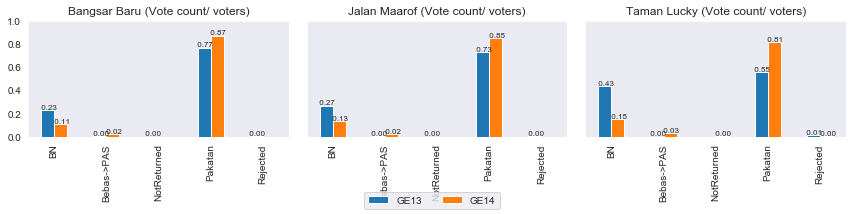

In [159]:
f, ax = plt.subplots(1,3, figsize=(12,3))

p1 = df_bb_score.plot.bar(ax=ax[0])
p2 = df_jm_score.plot.bar(ax=ax[1], sharey = p1)
p3 = df_tl_score.plot.bar(ax=ax[2], sharey = p1)

plt.subplots_adjust(wspace = 0.02)

for p, dm in zip([p1,p2,p3], ['Bangsar Baru','Jalan Maarof','Taman Lucky']):
    p.set_title('%s (Vote count/ voters)' % dm)
    p.set_ylim(0,1)
    p.legend().remove()
    
    for patch in p.patches:
        try:
            if patch.get_height()>0:
                p.annotate(' %.2f' % patch.get_height(), xy=( patch.get_x() + patch.get_width()/2 ,patch.get_height()+0.01), ha='center',fontsize=8)
        except:
            pass

    
handles, labels = p1.get_legend_handles_labels()
plt.figlegend(handles,labels ,loc = 'lower center', ncol=2, bbox_to_anchor=[0.5, 0.])

plt.tight_layout()

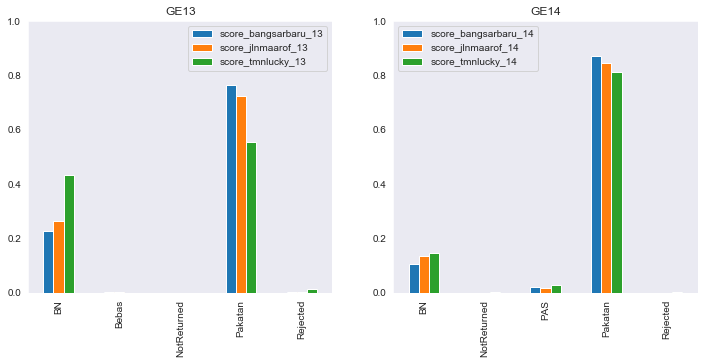

In [139]:
f,ax = plt.subplots(1,2, figsize=(12,5))

p1 = pd.DataFrame({'score_bangsarbaru_13':dict_score_13_bangsarbaru})\
.join(pd.DataFrame({'score_jlnmaarof_13':dict_score_13_jlnmaarof}))\
.join(pd.DataFrame({'score_tmnlucky_13':dict_score_13_tmnlucky})).plot.bar(ax=ax[0])

p2 = pd.DataFrame({'score_bangsarbaru_14':dict_score_14_bangsarbaru})\
.join(pd.DataFrame({'score_jlnmaarof_14':dict_score_14_jlnmaarof}))\
.join(pd.DataFrame({'score_tmnlucky_14':dict_score_14_tmnlucky})).plot.bar(ax=ax[1])


for p,ge in zip([p1,p2], ['GE13','GE14']):
    
    p.set_ylim(0,1)
    p.set_title(ge)
    
    for patch in p.patches:
        try:
            if patch.get_height()>0:
                p.annotate(' %.1f%%' % p.get_height(), xy=( p.get_x() + p.get_width() / 2.,p.get_height()+0.02), ha='center',fontsize=8)
        except:
            pass

<font size=3>
<li>The graphs above show that votes for Pakatan Rakyat go up in Bangsar. <br>
<li>There is a very obvious spike in favour of Pakatan in Taman Lucky. <br>
<li>Votes for BN decrease drastically, especially in Taman Lucky, losing ~50% of their votes in GE13.
</font>

In [134]:
BN13 = {'bangsarbaru':dict_score_13_bangsarbaru['BN'], 'jlnmaarof':dict_score_13_jlnmaarof['BN'], 'tmnlucky':dict_score_13_tmnlucky['BN']}
BN14 = {'bangsarbaru':dict_score_14_bangsarbaru['BN'], 'jlnmaarof':dict_score_14_jlnmaarof['BN'], 'tmnlucky':dict_score_14_tmnlucky['BN']}

PR13 = {'bangsarbaru':dict_score_13_bangsarbaru['Pakatan'], 'jlnmaarof':dict_score_13_jlnmaarof['Pakatan'], 'tmnlucky':dict_score_13_tmnlucky['Pakatan']}
PR14 = {'bangsarbaru':dict_score_14_bangsarbaru['Pakatan'], 'jlnmaarof':dict_score_14_jlnmaarof['Pakatan'], 'tmnlucky':dict_score_14_tmnlucky['Pakatan']}

PAS_BEBAS13 = {'bangsarbaru':dict_score_13_bangsarbaru['Bebas'], 'jlnmaarof':dict_score_13_jlnmaarof['Bebas'], 'tmnlucky':dict_score_13_tmnlucky['Bebas']}
PAS_BEBAS14 = {'bangsarbaru':dict_score_14_bangsarbaru['PAS'], 'jlnmaarof':dict_score_14_jlnmaarof['PAS'], 'tmnlucky':dict_score_14_tmnlucky['PAS']}

REJ13 = {'bangsarbaru':dict_score_13_bangsarbaru['Rejected'], 'jlnmaarof':dict_score_13_jlnmaarof['Rejected'], 'tmnlucky':dict_score_13_tmnlucky['Rejected']}
REJ14 = {'bangsarbaru':dict_score_14_bangsarbaru['Rejected'], 'jlnmaarof':dict_score_14_jlnmaarof['Rejected'], 'tmnlucky':dict_score_14_tmnlucky['Rejected']}

NR13 = {'bangsarbaru':dict_score_13_bangsarbaru['NotReturned'], 'jlnmaarof':dict_score_13_jlnmaarof['NotReturned'], 'tmnlucky':dict_score_13_tmnlucky['NotReturned']}
NR14 = {'bangsarbaru':dict_score_13_bangsarbaru['NotReturned'], 'jlnmaarof':dict_score_13_jlnmaarof['NotReturned'], 'tmnlucky':dict_score_13_tmnlucky['NotReturned']}

age

In [135]:
b1 = roll_bangsar13[['Umur','NamaDM']]
b2 = roll_bangsar14[['Age','NamaDM']]

# assign GE category
b1['GE'] = 'GE13'
b2['GE'] = 'GE14'

b2.columns = ['Umur','NamaDM','GE'] # rename columns

bp_data = b1.append(b2)
bp_data['Umur2'] = bp_data['Umur'] + 30

/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/kenghooi/miniconda3/envs/basic/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


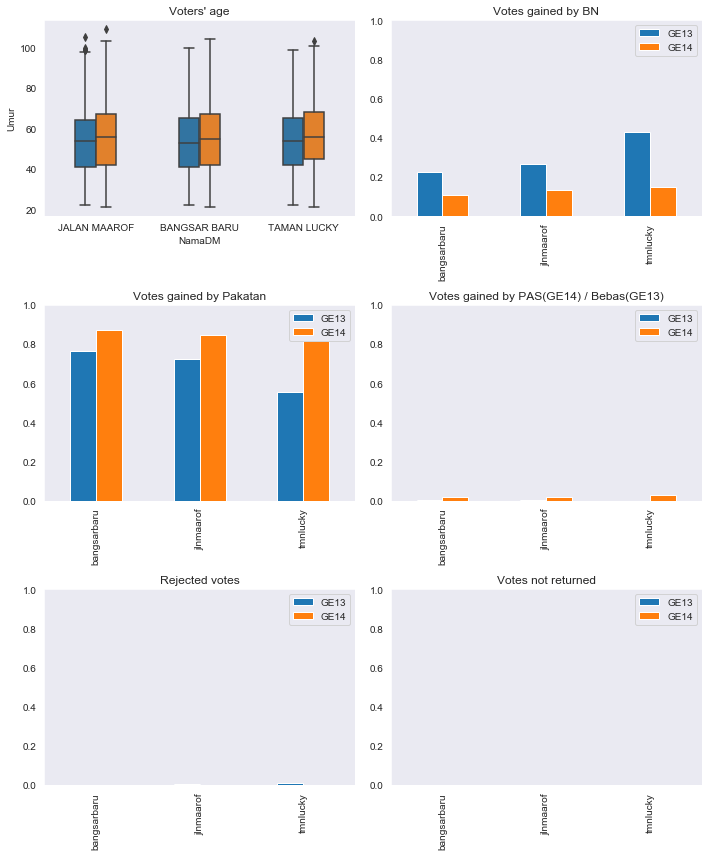

In [136]:
f,ax = plt.subplots(3,2,figsize=(10,12))
p_bn = pd.DataFrame({'GE13':BN13,'GE14':BN14}).plot.bar(ax=ax[0][1])
p_pr = pd.DataFrame({'GE13':PR13,'GE14':PR14}).plot.bar(ax=ax[1][0])
p_pas_bebas = pd.DataFrame({'GE13':PAS_BEBAS13,'GE14':PAS_BEBAS14}).plot.bar(ax=ax[1][1])
p_rej = pd.DataFrame({'GE13':REJ13,'GE14':REJ14}).plot.bar(ax=ax[2][0])
p_nr = pd.DataFrame({'GE13':NR13,'GE14':NR14}).plot.bar(ax=ax[2][1])

p_bn.set_ylim(0,1)
p_pr.set_ylim(0,1)
p_pas_bebas.set_ylim(0,1)
p_rej.set_ylim(0,1)
p_nr.set_ylim(0,1)

# boxplot
sns.boxplot(x='NamaDM',y='Umur',hue='GE',data=bp_data,ax=ax[0][0],width=0.4, boxprops=dict(alpha=1))
ax[0][0].legend().remove()
# p_bn2.set_ylim(0,180)

ax[0][0].set_title("Voters' age")
p_bn.set_title('Votes gained by BN')
p_pr.set_title('Votes gained by Pakatan')
p_pas_bebas.set_title('Votes gained by PAS(GE14) / Bebas(GE13)')
p_rej.set_title('Rejected votes')
p_nr.set_title('Votes not returned')

plt.tight_layout()